# Heart Disease Classification

This notebook uses Machine learning technique to predict the heart disease using classification algorithms.

**What is classification?**

Classification is the way to decide whether the sample is of one class or another, known as `single-class classificatin`. If it classifies between multiple classes it's called `Multi-class Classification`.

#### Machine Learning Modeling Framework
1. Problem Defination
2. Data
3. Evaluation 
4. Feature
5. Modelling
6. Experiment


## 1. Problem Defination
Problem is to explore whether the patient has a heart disease or not, that's why `binary classification`. 

## 2. Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

Data has been taken form the kaggle's [Heart-disease-uci](https://www.kaggle.com/ronitf/heart-disease-uci)

Though, the original data came from the Cleveland database from UCI Machine Learning Repository.


## 3. Evaluation

The goal is to train model to provide more than or equal to 95% accuracy to the test dataset.


## 4. Feature

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  *  0: Typical angina: chest pain related decrease blood supply to the heart
  *  1: Atypical angina: chest pain not related to heart
  *  2: Non-anginal pain: typically esophageal spasms (non heart related)
  *  3: Asymptomatic: chest pain not showing signs of disease
4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
5.  chol - serum cholestoral in mg/dl
  *  serum = LDL + HDL + .2 * triglycerides
  *  above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  *  0: Nothing to note
  *  1: ST-T Wave abnormality
     can range from mild symptoms to severe problems
     signals non-normal heart beat
  *  2: Possible or definite left ventricular hypertrophy
     Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  *  0: Upsloping: better heart rate with excercise (uncommon)
  *  1: Flatsloping: minimal change (typical healthy heart)
  *  2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
  *  1,3: normal
  *  6: fixed defect: used to be defect but ok now
  *  7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the data

In [38]:
# Importing the important modules used in ml modelling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [39]:
# Importing the data set
df = pd.read_csv("heart.csv")

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

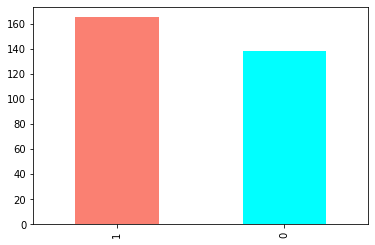

In [42]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "cyan"]);

### Checking if data has empty data or string data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


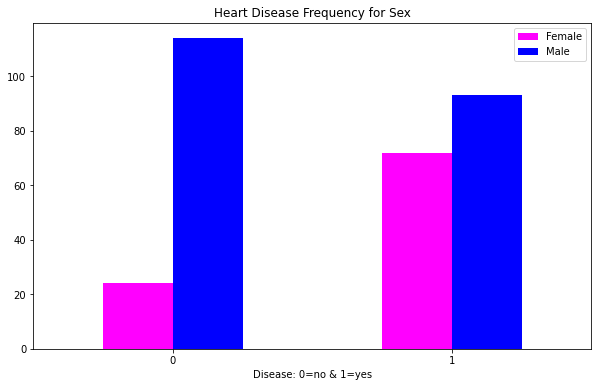

In [46]:
# Plot to demonstrate crosstab between sex and target

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["magenta", "blue"])
plt.xlabel("Disease: 0=no & 1=yes")
plt.xticks(rotation=0)
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female", "Male"]);

This graph infers that males are 50% chances and females are having 75% chances of having heart disease.(Both approx)

### Age vs Max heart rate for heart disease

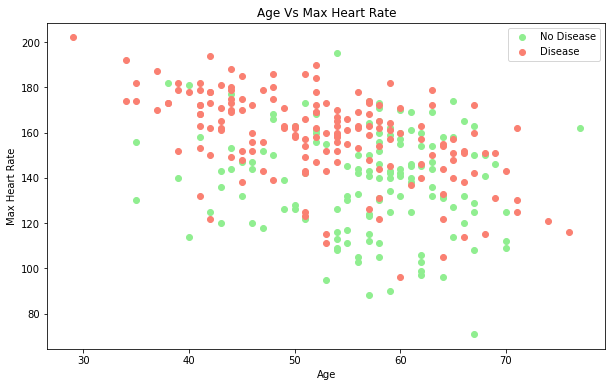

In [47]:
# Plot to demonstrate age vs max heart rate

plt.figure(figsize=(10,6));

plt.scatter(df.age[df.target ==0],
           df.thalach[df.target == 0],
           c="lightgreen")

plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")

plt.legend(["No Disease", "Disease"])

plt.title("Age Vs Max Heart Rate")

plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

This suggests that more the age is less the max heart rate is.

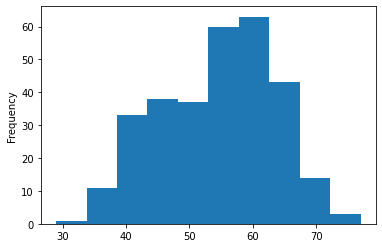

In [48]:
# Graph to check age distribution
df.age.plot.hist(bins=10);

## Heart Disease Frequency Vs Chest Pain Type

cp - chest pain type
  *  0: Typical angina: chest pain related decrease blood supply to the heart
  *  1: Atypical angina: chest pain not related to heart
  *  2: Non-anginal pain: typically esophageal spasms (non heart related)
  *  3: Asymptomatic: chest pain not showing signs of disease

In [49]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


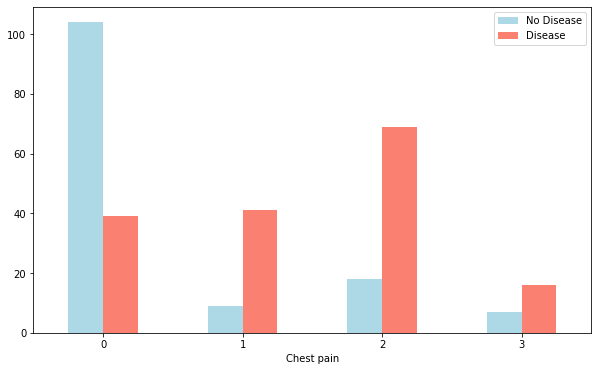

In [50]:
# Graph to show crosstab between Heart Disease freq and Chest pain type
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.xlabel("Chest pain")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [51]:
# Correlation matrix 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


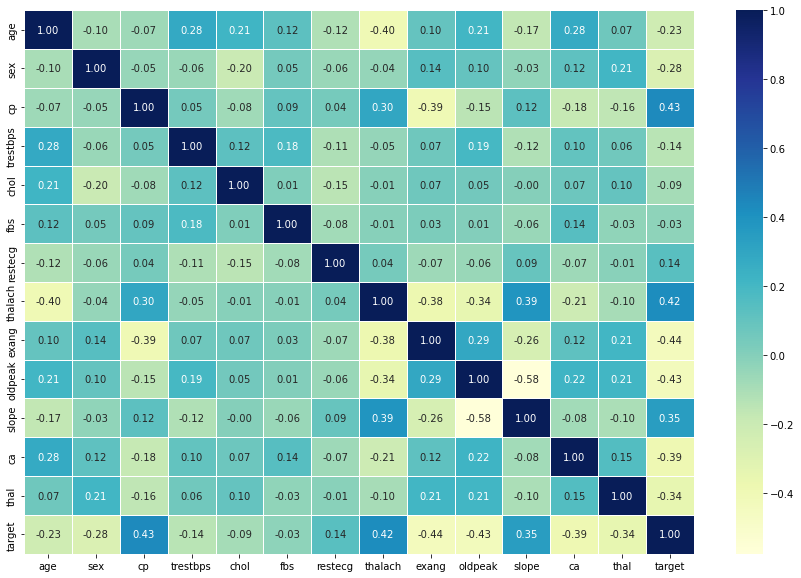

In [52]:
# Way to understand more from it

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu");

Some features show little high negative correlation with target variable so I could eliminate few of them after predicting on all features first to drow threshold line.

## 5. Modelling

In [53]:
# Getting data ready for modelling

X = df.drop("target", axis=1)
y = df.target.values

In [54]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
# Splitting into training and test datasets
from sklearn.model_selection import train_test_split

# Random seed variable
seed_value = 19

np.random.seed(seed_value)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

I am going to try three Machine Learning models:
1. Logistic Regression
2. K-Nearest Neighbours 
3. Random Forest Classification

In [58]:
# Importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Dictionary of models
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbors Classifier": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Scores model on the given dictionary of models.
    X_train: Taining data (no labels)
    X_test: Testing data (no labels)
    y_train: Training labels
    y_test: Testing labels
    """
    # Setting random seed
    np.random.seed(seed_value)
    
    # empty dictionary to get model scores
    model_scores = {}
    
    # Loop to reach each model and fit and score it
    for name, model in models.items():
        
        # fit model
        model.fit(X_train, y_train)
        
        # Evaluate and put model in model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [60]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

D:\ML_Projects\Heart-Disease-Classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7868852459016393,
 'KNeighbors Classifier': 0.6229508196721312,
 'Random Forest Classifier': 0.8032786885245902}

### Model Comparison

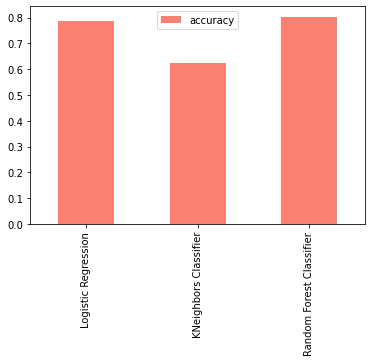

In [71]:
# Graphical representation of models
models_compare = pd.DataFrame(model_scores, index=["accuracy"])
models_compare.T.plot.bar(color="salmon");

From here I can set baseline for more improvement.

Also, this shows till now random forest is best

## Ways to improve model:


### Hyperparameter Tuning (Manually)

#### Tuning Logistic Regression

In [94]:
# Tuning Logistic Regression

# solvers = [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
# penalty = [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
# C = [100, 10, 1.0, 0.1, 0.01]

model = LogisticRegression(random_state=19, penalty="l2", solver="liblinear", C=0.01) #0.7377049180327869
model = LogisticRegression(random_state=19, penalty="l2", solver="liblinear", C=0.1)  #0.8032786885245902

model.fit(X_train, y_train)

# Training score
Train_score = model.score(X_train, y_train)

# Testing score
test_score = model.score(X_test, y_test)

In [95]:
Train_score, test_score

(0.8636363636363636, 0.8032786885245902)

In [75]:
model_scores

{'Logistic Regression': 0.7868852459016393,
 'KNeighbors Classifier': 0.6229508196721312,
 'Random Forest Classifier': 0.8032786885245902}

#### Tuning KNN 

In [100]:
train_scores = []
test_scores = []

# List of values from 1 to 21
neighbors = range(1,21)

# KNN Model instance
model = KNeighborsClassifier()

# Loop through different n_neighbors values
for n in neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # Adding scores in train_scores
    train_scores.append(model.score(X_train, y_train))
    
    # Adding scores in test_scores
    test_scores.append(model.score(X_test, y_test))

In [101]:
train_scores

[1.0,
 0.8181818181818182,
 0.7933884297520661,
 0.7768595041322314,
 0.7520661157024794,
 0.7727272727272727,
 0.7479338842975206,
 0.731404958677686,
 0.7107438016528925,
 0.731404958677686,
 0.7231404958677686,
 0.743801652892562,
 0.7231404958677686,
 0.731404958677686,
 0.7066115702479339,
 0.7024793388429752,
 0.6942148760330579,
 0.7066115702479339,
 0.7107438016528925,
 0.7107438016528925]

In [103]:
test_scores

[0.5409836065573771,
 0.5409836065573771,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803]

In [104]:
model_scores

{'Logistic Regression': 0.7868852459016393,
 'KNeighbors Classifier': 0.6229508196721312,
 'Random Forest Classifier': 0.8032786885245902}

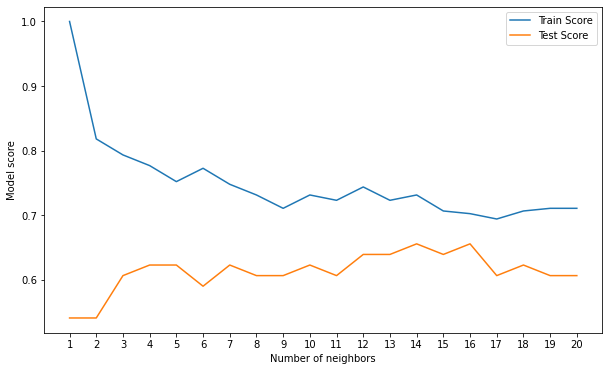

In [106]:
# Graph to understand more 

plt.figure(figsize=(10,6))
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();